In [240]:
import pandas as pd

In [241]:
data = pd.read_csv('datosproyecto1', index_col=0)
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,...,0,59.0,0.940725,1,0,0,0,1,0,0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,...,0,56.0,0.800382,1,0,0,0,1,0,0
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,...,0,56.0,0.800125,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,...,0,59.0,0.750051,2,0,0,0,0,0,1
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,...,1,58.0,0.700557,2,0,0,0,0,0,1
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,...,1,57.0,0.700505,2,0,0,0,0,0,1
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,...,1,38.0,0.700246,2,0,0,0,0,0,1


### Incluir seaborn para Visualización

In [244]:
import seaborn as sns

In [245]:
%matplotlib inline

### Histogramas por cada variable y dispersión entre variables

### Matriz de correlación

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

In [371]:

titulos= list(data.columns[:])
titulos.remove("date")
titulos.remove("quarter")
titulos.remove("department")
titulos.remove("day")
titulos.remove("actual_productivity")
titulos


['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'quarter_cat',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

### Modelo de regresión 



In [249]:
# nombres de características
features = titulos

# dataframe de características
X = data[features]

X.head()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,8,0.8,26.16,1108.0,7080,98,0.0,0,0,59.0,1,0,0,0,1,0,0
2,11,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,0,0,1,0,0
3,12,0.8,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,0,0,1,0,0
4,6,0.8,25.90,1170.0,1920,50,0.0,0,0,56.0,1,0,0,0,1,0,0
5,7,0.8,25.90,984.0,6720,38,0.0,0,0,56.0,1,0,0,0,1,0,0


In [250]:
X.shape

(691, 17)

In [251]:
# variable de respuesta
y = data['actual_productivity']

y.head()

0    0.940725
2    0.800570
3    0.800570
4    0.800382
5    0.800125
Name: actual_productivity, dtype: float64

In [252]:
# tipos de X y y
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


### División entre entrenamiento y prueba

In [261]:
from sklearn.model_selection import train_test_split
# volviendo al caso en que cambia el tamaño del conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [262]:
from sklearn.linear_model import LinearRegression

# crear el objeto del modelo
linreg = LinearRegression()

# ajustar los parámetros del modelo usando los datos de entrenamiento
linreg.fit(X_train, y_train)

LinearRegression()

In [263]:
# imprimir coeficientes
print(linreg.intercept_)
print(linreg.coef_)

0.18114666069106233
[-3.01839672e-03  6.44836205e-01 -3.51484149e-03 -1.29758445e-06
 -3.76058685e-06  3.16365186e-03  1.12990095e-03 -5.75092966e-03
  3.60935017e-03  1.38444370e-03 -6.86621744e-03  8.28320676e-03
 -2.61094709e-03 -2.77708755e-03  6.73892927e-04  4.20463411e-03
 -7.77369917e-03]


In [264]:
# coeficientes con nombre de las características
list(zip(features, linreg.coef_))

[('team', -0.0030183967171483832),
 ('targeted_productivity', 0.6448362054348047),
 ('smv', -0.0035148414859687647),
 ('wip', -1.29758445209399e-06),
 ('over_time', -3.7605868543114527e-06),
 ('incentive', 0.0031636518597655443),
 ('idle_time', 0.001129900946871359),
 ('idle_men', -0.0057509296559468525),
 ('no_of_style_change', 0.003609350165704528),
 ('no_of_workers', 0.0013844437020163836),
 ('quarter_cat', -0.006866217443374914),
 ('day_Monday', 0.0082832067640355),
 ('day_Saturday', -0.002610947085336941),
 ('day_Sunday', -0.0027770875494881136),
 ('day_Thursday', 0.0006738929267918242),
 ('day_Tuesday', 0.0042046341126049745),
 ('day_Wednesday', -0.007773699168608024)]

### Predicciones usando los datos de prueba

In [265]:
y_pred = linreg.predict(X_test)

### Evaluar el modelo

**Error absoluto medio**: 

$$\text{MAE} = \frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Error cuadrado medio**: 
$$\text{MSE} = \frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Raíz del Error cuadrado medio**: 
$$\text{RMSE} = \sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [266]:
from sklearn import metrics

In [267]:
import numpy as np

# mean absolute error
MAE = metrics.mean_absolute_error(y_test, y_pred)

# mean squared error
MSE = metrics.mean_squared_error(y_test, y_pred)

# root mean squared error
RMSE = np.sqrt(MSE)

In [268]:
print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.0424624754630586
MSE:  0.004107958943443947
RMSE:  0.06409336114952895


### Selección de variables - Modelo con otro subconjunto de variables

In [269]:
featuresb = titulos

X = data[featuresb]
y = data.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_test)

MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)

MAE:  0.04077814480138319
MSE:  0.0041951512641200004
RMSE:  0.06476998737162144


### Validación cruzada

In [367]:
from sklearn.model_selection import cross_val_score

# usar MSE - error cuadrático medio
scores = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = - scores
print(mse_scores)
print(mse_scores.mean())

[0.00299875 0.00365181 0.21054787 0.00815239 0.00374021]
0.0458182059692271


In [271]:
# calcular RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[0.05470982 0.06039171 0.49720598 0.09026311 0.06120276]


In [272]:
# RMSE promedio a través de todos los grupos
print(rmse_scores.mean())

0.15275467413322727


In [273]:
data

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,...,0,59.0,0.940725,1,0,0,0,1,0,0
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,...,0,30.5,0.800570,1,0,0,0,1,0,0
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,...,0,56.0,0.800382,1,0,0,0,1,0,0
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,...,0,56.0,0.800125,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,...,0,59.0,0.750051,2,0,0,0,0,0,1
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,...,1,58.0,0.700557,2,0,0,0,0,0,1
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,...,1,57.0,0.700505,2,0,0,0,0,0,1
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,...,1,38.0,0.700246,2,0,0,0,0,0,1


## Ahora usando statsmodels

In [372]:
import statsmodels.api as sm

features = titulos

X = data[features]
y = data.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.794
Model:                             OLS   Adj. R-squared:                  0.788
Method:                  Least Squares   F-statistic:                     121.0
Date:                 Tue, 12 Mar 2024   Prob (F-statistic):          2.13e-160
Time:                         14:52:09   Log-Likelihood:                 633.82
No. Observations:                  518   AIC:                            -1234.
Df Residuals:                      501   BIC:                            -1161.
Df Model:                           16                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [373]:
predicted_y=[]

for indice, fila in X_test.iterrows():
    parms = fila.values.tolist()
    parms.insert(0, model.params[0])
    prediccion= model.predict(parms)
    predicted_y.append(prediccion)


MAE = metrics.mean_absolute_error(y_test, predicted_y)
MSE = metrics.mean_squared_error(y_test, predicted_y)
RMSE = np.sqrt(MSE)

print("MAE: ", MAE)
print("MSE: ", MSE)
print("RMSE: ", RMSE)


MAE:  0.1449458337818947
MSE:  0.023576863872391135
RMSE:  0.15354759481148225


C:\Users\luisc\AppData\Local\Temp\ipykernel_28364\2620447420.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  parms.insert(0, model.params[0])


In [374]:
p_values= model.pvalues
print(p_values)
print(X)
nivel_significancia=0.05
variables_significativas = [X.columns[i] for i in range(0, len(X.columns)) if p_values[i+1] < nivel_significancia]
print(X.columns[0])
variables_significativas

const                    3.622525e-07
team                     2.672161e-03
targeted_productivity    8.373302e-54
smv                      2.466802e-09
wip                      4.016368e-01
over_time                4.741635e-03
incentive                1.126627e-70
idle_time                6.032770e-07
idle_men                 3.079189e-13
no_of_style_change       8.513257e-01
no_of_workers            1.354970e-03
quarter_cat              3.335279e-01
day_Monday               1.202851e-04
day_Saturday             7.327193e-03
day_Sunday               6.862809e-03
day_Thursday             7.835902e-04
day_Tuesday              9.843258e-04
day_Wednesday            2.431340e-02
dtype: float64
      team  targeted_productivity    smv     wip  over_time  incentive  \
0        8                   0.80  26.16  1108.0       7080         98   
2       11                   0.80  11.41   968.0       3660         50   
3       12                   0.80  11.41   968.0       3660         50   
4    

C:\Users\luisc\AppData\Local\Temp\ipykernel_28364\3599136994.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variables_significativas = [X.columns[i] for i in range(0, len(X.columns)) if p_values[i+1] < nivel_significancia]


['team',
 'targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_workers',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

In [347]:



featuresb = variables_significativas

X = data[featuresb]
y = data.actual_productivity

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# agregar constante explíticamente
X_train = sm.add_constant(X_train)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model = sm.OLS(y_train, X_train).fit()

# resumen de resultados
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.794
Model:                             OLS   Adj. R-squared:                  0.789
Method:                  Least Squares   F-statistic:                     149.3
Date:                 Mon, 11 Mar 2024   Prob (F-statistic):          2.48e-163
Time:                         19:22:15   Log-Likelihood:                 633.09
No. Observations:                  518   AIC:                            -1238.
Df Residuals:                      504   BIC:                            -1179.
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [348]:
variables_significativas

['team',
 'targeted_productivity',
 'smv',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_workers',
 'day_Monday',
 'day_Saturday',
 'day_Sunday',
 'day_Thursday',
 'day_Tuesday',
 'day_Wednesday']

In [301]:
data2 = pd.read_csv('finishing_datos')
colu = titulos
colu.remove("wip")

X2 = data2[colu]
y2 = data2.actual_productivity

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

# agregar constante explíticamente
X_train2 = sm.add_constant(X_train2)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2 = sm.OLS(y_train2, X_train2).fit()

# resumen de resultados
print(model2.summary())



                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.210
Model:                             OLS   Adj. R-squared:                  0.155
Method:                  Least Squares   F-statistic:                     3.826
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):           3.51e-05
Time:                         20:45:57   Log-Likelihood:                 52.393
No. Observations:                  186   AIC:                            -78.79
Df Residuals:                      173   BIC:                            -36.85
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [303]:
p_values2= model2.pvalues
nivel_significancia=0.05
variables_significativas2 = [X2.columns[i] for i in range(0,len(X2.columns)) if p_values2[i+1] < nivel_significancia]


featuresb = variables_significativas2

X2 = data2[featuresb]
y2 = data2.actual_productivity

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=1)

# agregar constante explíticamente
X_train2 = sm.add_constant(X_train2)

# regresión usando mínimos cuadrados ordinarios (ordinary least squares - OLS) 
model2 = sm.OLS(y_train2, X_train2).fit()

# resumen de resultados
print(model2.summary())

                             OLS Regression Results                            
Dep. Variable:     actual_productivity   R-squared:                       0.183
Model:                             OLS   Adj. R-squared:                  0.170
Method:                  Least Squares   F-statistic:                     13.62
Date:                 Sun, 10 Mar 2024   Prob (F-statistic):           4.67e-08
Time:                         20:46:19   Log-Likelihood:                 49.346
No. Observations:                  186   AIC:                            -90.69
Df Residuals:                      182   BIC:                            -77.79
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3084      0.083 

C:\Users\luisc\AppData\Local\Temp\ipykernel_28364\3916753734.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  variables_significativas2 = [X2.columns[i] for i in range(0,len(X2.columns)) if p_values2[i+1] < nivel_significancia]


In [304]:
data2

,Unnamed: 0,date,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,...,no_of_style_change,no_of_workers,actual_productivity,quarter_cat,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,18,1/1/2015,Quarter1,finishing,Thursday,11,0.70,4.15,1440,0,...,0,12.0,0.436326,1,0,0,0,1,0,0
1,602,2/4/2015,Quarter1,finishing,Wednesday,2,0.80,3.94,2160,0,...,0,18.0,0.966759,1,0,0,0,0,0,1
2,603,2/4/2015,Quarter1,finishing,Wednesday,1,0.80,3.94,1200,0,...,0,10.0,0.929183,1,0,0,0,0,0,1
3,604,2/4/2015,Quarter1,finishing,Wednesday,8,0.70,4.15,3000,0,...,0,25.0,0.915767,1,0,0,0,0,0,1
4,608,2/4/2015,Quarter1,finishing,Wednesday,7,0.70,3.94,960,0,...,0,8.0,0.779792,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,960,0,...,0,8.0,0.628333,2,0,0,0,0,0,1
245,1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,960,0,...,0,8.0,0.625625,2,0,0,0,0,0,1
246,1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,960,0,...,0,8.0,0.625625,2,0,0,0,0,0,1
247,1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,1800,0,...,0,15.0,0.505889,2,0,0,0,0,0,1


### Determinar la influencia de las observaciones

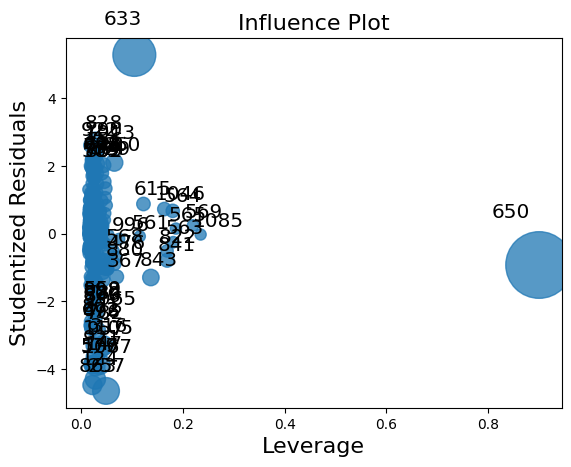

In [281]:
fig = sm.graphics.influence_plot(model, criterion="cooks")

### Determinar puntos de alta influencia con distancia de Cook y umbral $4/n$

In [305]:
# disntacia de Cook
model_cooksd = model.get_influence().cooks_distance[0]

# get length of df to obtain n
n = X_train.shape[0]

# umbral
critical_d = 4/n
print('Umbral con distancia de Cook:', critical_d)

# puntos que podrían ser ourliers con alta influencia
out_d = model_cooksd > critical_d

print(X_train.index[out_d], "\n", model_cooksd[out_d])

Umbral con distancia de Cook: 0.007722007722007722
Index([ 650,  579,  921,  809,  843,  784, 1067,  729,  257,  355,  782,  303,
        828,  577,  496,  633,  756, 1013,  840,  147,  672, 1065,  204,  673,
       1046,  367, 1105,  863,  801,  790,   36,  957,  124,  860,  316],
      dtype='int64') 
 [0.49442122 0.01757014 0.02517164 0.00793348 0.0117717  0.0099755
 0.02601598 0.0107584  0.08654529 0.01645691 0.02051939 0.01049432
 0.0129677  0.01884873 0.01060865 0.17473944 0.00944603 0.01058371
 0.00795152 0.0348492  0.01127086 0.00980883 0.0107616  0.01094313
 0.01704305 0.00993032 0.01167792 0.02588205 0.01032453 0.01076181
 0.01175276 0.01196758 0.02984859 0.01609908 0.03244514]


In [283]:
X_train[out_d]

,const,team,targeted_productivity,smv,wip,incentive,idle_time,idle_men,no_of_style_change,quarter_cat,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
650,1.0,7,0.70,24.26,658.0,0,270.0,45,0,1,1,0,0,0,0
579,1.0,8,0.65,24.26,1435.0,0,0.0,0,0,1,0,0,0,0,0
922,1.0,9,0.75,18.79,1085.0,56,0.0,0,1,2,0,0,0,0,1
921,1.0,1,0.60,22.53,708.0,0,0.0,0,1,2,0,0,0,1,0
843,1.0,8,0.65,29.40,962.0,0,4.5,30,2,2,0,0,0,0,1
784,1.0,9,0.50,18.79,1688.0,0,0.0,0,1,2,0,1,0,0,0
1067,1.0,6,0.75,18.79,52.0,0,0.0,0,0,1,0,0,0,0,1
826,1.0,11,0.70,11.41,685.0,30,0.0,0,2,2,0,0,0,0,1
729,1.0,11,0.35,11.41,434.0,0,0.0,0,1,2,0,0,0,0,1
257,1.0,2,0.80,51.02,1086.0,27,0.0,0,0,2,0,0,0,0,1


In [284]:
y_train[out_d]

650     0.662270
579     0.260979
922     0.970817
921     0.268214
843     0.251399
784     0.283054
1067    0.332146
826     0.821113
729     0.507903
257     0.311207
782     0.432123
828     0.800980
577     0.295308
496     0.285333
633     0.522845
756     0.750392
1013    0.800116
840     0.328132
613     0.700135
147     0.233705
672     0.355534
1065    0.433263
204     0.800274
673     0.353260
367     0.520238
1105    0.408960
863     0.249417
841     0.303574
801     0.329965
790     0.800980
957     0.495618
124     0.412120
860     0.611141
316     0.403242
Name: actual_productivity, dtype: float64